# Travelling in the BlockChain Ecosystem with Python

https://towardsdatascience.com/travelling-in-the-blockchain-ecosystem-with-python-47ab5dd0500d

In [3]:
## All CryptoCompare Symbols and Stats
import pandas as pd
import json, urllib.request

# Download Coin Names and Stats from CryptoCompare
# https://min-api.cryptocompare.com/documentation?key=Other&cat=allExchangesV2Endpoint
url = 'https://www.cryptocompare.com/api/data/coinlist/'
data = urllib.request.urlopen(url).read().decode('utf8')
data = json.loads(data)
data = pd.DataFrame(data['Data']).T

# Convert str to int with "N/A" as NaN
data.FullyPremined = data.FullyPremined.apply(pd.to_numeric, errors='coerce') 
data.BuiltOn = pd.to_numeric(data.BuiltOn, downcast='integer', errors='coerce')
data.Id = data.Id.apply(pd.to_numeric, errors='coerce') 
data.SortOrder = data.SortOrder.apply(pd.to_numeric, errors='coerce') 
data.TotalCoinSupply = data.TotalCoinSupply.apply(pd.to_numeric, errors='coerce') 

# Sort by "SortOrder"
data = data.sort_values("SortOrder")
data['BuiltOn'] = data['BuiltOn'].fillna(data['Id'])
data.head()

,Algorithm,BuiltOn,CoinName,ContentCreatedOn,FullName,FullyPremined,Id,ImageUrl,Name,PreMinedValue,ProofType,SmartContractAddress,SortOrder,Sponsored,Symbol,Taxonomy,TotalCoinSupply,TotalCoinsFreeFloat,Url
BTC,SHA-256,1182.0,Bitcoin,1417635237,Bitcoin (BTC),0,1182,/media/19633/btc.png,BTC,N/A,PoW,N/A,1,False,BTC,"{'Access': 'Permissionless', 'FCA': 'Exchange'...",21000000.0,N/A,/coins/btc/overview
ETH,Ethash,7605.0,Ethereum,1438259812,Ethereum (ETH),0,7605,/media/20646/eth_logo.png,ETH,N/A,PoW,N/A,2,False,ETH,"{'Access': 'Permissionless', 'FCA': 'Exchange,...",0.0,N/A,/coins/eth/overview
LTC,Scrypt,3808.0,Litecoin,1426004323,Litecoin (LTC),0,3808,/media/35309662/ltc.png,LTC,N/A,PoW,N/A,3,False,LTC,"{'Access': 'Permissionless', 'FCA': 'Exchange'...",84000000.0,N/A,/coins/ltc/overview
DASH,X11,3807.0,Dash,1426004252,Dash (DASH),0,3807,/media/33842920/dash.png,DASH,N/A,PoW/PoS,N/A,4,False,DASH,"{'Access': 'Permissionless', 'FCA': 'Exchange'...",22000000.0,N/A,/coins/dash/overview
XMR,CryptoNight-V7,5038.0,Monero,1428672055,Monero (XMR),0,5038,/media/19969/xmr.png,XMR,N/A,PoW,N/A,5,False,XMR,"{'Access': 'Permissionless', 'FCA': 'Exchange'...",0.0,N/A,/coins/xmr/overview


Next, we’ll find the number of token projects per protocol

In [4]:
# Protocol token counts per coin
protocols = pd.merge(pd.DataFrame(data.groupby(['BuiltOn']).size().sort_values(ascending=False)), data[['Id', 'Name']], left_on = 'BuiltOn', right_on = 'Id')
protocols.rename(columns={0: 'Counts', 'Name':'ProtocolSymbol'}, inplace=True)

# For protocol plots below
import numpy as np
protoFlags = np.linspace(.01, .99, len(protocols))
np.random.shuffle(protoFlags)
protocols['Flags'] = protoFlags
protocols = protocols[['Id', 'Counts', 'ProtocolSymbol', 'Flags']].head(30)

# Merge scoring for plots
protocolPlot = pd.merge(data, protocols, right_on = 'Id', left_on = 'BuiltOn', how = 'outer').sort_values("SortOrder")
protocols.head(30)

,Id,Counts,ProtocolSymbol,Flags
0,7605,2192,ETH,0.167480
1,20131,55,WAVES,0.767772
2,4614,34,XLM,0.479149
3,27368,28,NEO,0.339776
4,166503,20,EOS,0.362822
5,5292,14,XCP,0.873124
6,1182,14,BTC,0.600414
7,1183,14,NXT,0.734300
8,5039,13,BTS,0.195465
9,310829,11,TRX,0.435801


We’ll then create a TreeMap to visualize the proportions across different protocols groupings

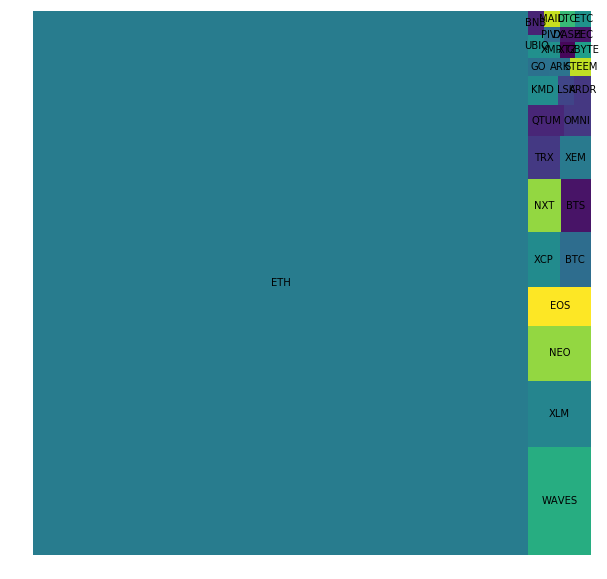

In [6]:
# Tokens per protocol
import matplotlib.pyplot as plt

# Data
names = protocols['ProtocolSymbol'].head(30)
size = protocols['Counts'].head(30)

# libraries
import matplotlib.pyplot as plt
import squarify    # squarify is an algorithm for treemap
 
# If you have 2 lists
fig, ax = plt.subplots(figsize=(10,10))   
squarify.plot(sizes=size, label=names, alpha=1 )
plt.axis('off')
plt.show()